# Part one

In [1]:
import numpy as np
from io import StringIO
from pprint import pprint

In [2]:
test_input = """162,817,812
57,618,57
906,360,560
592,479,940
352,342,300
466,668,158
542,29,236
431,825,988
739,650,466
52,470,668
216,146,977
819,987,18
117,168,530
805,96,715
346,949,466
970,615,88
941,993,340
862,61,35
984,92,344
425,690,689
"""

In [3]:
junction_boxes = np.genfromtxt(StringIO(test_input), dtype=int, delimiter=",")

In [4]:
from sklearn.metrics import pairwise_distances

In [5]:
max_cables = 10

In [6]:
distances_matrix = pairwise_distances(junction_boxes)
distances = []
for i in range(0, len(junction_boxes)):
    for j in range(i + 1, len(junction_boxes)):
        distances.append((i, j, distances_matrix[i,j]))
pprint(sorted(distances, key=lambda x: x[2])[:max_cables])

[(0, 19, np.float64(316.90219311326956)),
 (0, 7, np.float64(321.560258738545)),
 (2, 13, np.float64(322.36935338211043)),
 (7, 19, np.float64(328.11888089532425)),
 (17, 18, np.float64(333.6555109690233)),
 (9, 12, np.float64(338.33858780813046)),
 (11, 16, np.float64(344.3893145845266)),
 (2, 8, np.float64(347.59890678769403)),
 (14, 19, np.float64(350.786259708102)),
 (2, 18, np.float64(352.936254867646))]


In [7]:
max_circuits = 3

In [8]:
circuits = {}
jb_to_circuit = {}
n_circuits = 0
n_cables_used = 0
n_connections_examined = 0
for i, j, d in sorted(distances, key=lambda x: x[2]):
    if n_connections_examined >= max_cables:
        break
    circuit_i = jb_to_circuit.get(i)
    circuit_j = jb_to_circuit.get(j)
    if circuit_i is None and circuit_j is None:
        n_circuits += 1
        circuits[n_circuits] = {i, j}
        jb_to_circuit[i] = n_circuits
        jb_to_circuit[j] = n_circuits
        circuit_i = n_circuits
        circuit_j = n_circuits
        n_cables_used += 1
    elif circuit_i is not None and circuit_j is not None:
        if circuit_i != circuit_j:
            circuits[circuit_i] = circuits[circuit_i].union(circuits[circuit_j])
            for circuit_j_elem in circuits[circuit_j]:
                jb_to_circuit[circuit_j_elem] = circuit_i
            del circuits[circuit_j]
            n_cables_used += 1
    else:
        if circuit_j is None:
            circuits[circuit_i].add(j)
            jb_to_circuit[j] = circuit_i
            circuit_j = circuit_i
        else:
            circuits[circuit_j].add(i)
            jb_to_circuit[i] = circuit_j
            circuit_i = circuit_j
        n_cables_used += 1
    j_i = junction_boxes[i]
    j_j = junction_boxes[j]
    n_connections_examined += 1
    print(f"{n_connections_examined=} {i=} {j=} {j_i=} {j_j=} {d=} {circuit_i=} {circuit_j=} {circuits=} {n_circuits=} {n_cables_used=}")
print(np.prod(sorted([len(v) for v in circuits.values()])[-max_circuits:]))

n_connections_examined=1 i=0 j=19 j_i=array([162, 817, 812]) j_j=array([425, 690, 689]) d=np.float64(316.90219311326956) circuit_i=1 circuit_j=1 circuits={1: {0, 19}} n_circuits=1 n_cables_used=1
n_connections_examined=2 i=0 j=7 j_i=array([162, 817, 812]) j_j=array([431, 825, 988]) d=np.float64(321.560258738545) circuit_i=1 circuit_j=1 circuits={1: {0, 19, 7}} n_circuits=1 n_cables_used=2
n_connections_examined=3 i=2 j=13 j_i=array([906, 360, 560]) j_j=array([805,  96, 715]) d=np.float64(322.36935338211043) circuit_i=2 circuit_j=2 circuits={1: {0, 19, 7}, 2: {2, 13}} n_circuits=2 n_cables_used=3
n_connections_examined=4 i=7 j=19 j_i=array([431, 825, 988]) j_j=array([425, 690, 689]) d=np.float64(328.11888089532425) circuit_i=1 circuit_j=1 circuits={1: {0, 19, 7}, 2: {2, 13}} n_circuits=2 n_cables_used=3
n_connections_examined=5 i=17 j=18 j_i=array([862,  61,  35]) j_j=array([984,  92, 344]) d=np.float64(333.6555109690233) circuit_i=3 circuit_j=3 circuits={1: {0, 19, 7}, 2: {2, 13}, 3: {

In [9]:
def solve(input_, max_cables=10, max_circuits=3):
    junction_boxes = np.genfromtxt(StringIO(input_), dtype=int, delimiter=",")

    distances_matrix = pairwise_distances(junction_boxes)
    distances = []
    for i in range(0, len(junction_boxes)):
        for j in range(i + 1, len(junction_boxes)):
            distances.append((i, j, distances_matrix[i,j]))

    circuits = {}
    jb_to_circuit = {}
    n_circuits = 0
    n_cables_used = 0
    n_connections_examined = 0
    for i, j, d in sorted(distances, key=lambda x: x[2]):
        if n_connections_examined >= max_cables:
            break
        circuit_i = jb_to_circuit.get(i)
        circuit_j = jb_to_circuit.get(j)
        if circuit_i is None and circuit_j is None:
            n_circuits += 1
            circuits[n_circuits] = {i, j}
            jb_to_circuit[i] = n_circuits
            jb_to_circuit[j] = n_circuits
            circuit_i = n_circuits
            circuit_j = n_circuits
            n_cables_used += 1
        elif circuit_i is not None and circuit_j is not None:
            if circuit_i != circuit_j:
                circuits[circuit_i] = circuits[circuit_i].union(circuits[circuit_j])
                for circuit_j_elem in circuits[circuit_j]:
                    jb_to_circuit[circuit_j_elem] = circuit_i
                del circuits[circuit_j]
                n_cables_used += 1
        else:
            if circuit_j is None:
                circuits[circuit_i].add(j)
                jb_to_circuit[j] = circuit_i
                circuit_j = circuit_i
            else:
                circuits[circuit_j].add(i)
                jb_to_circuit[i] = circuit_j
                circuit_i = circuit_j
            n_cables_used += 1
        j_i = junction_boxes[i]
        j_j = junction_boxes[j]
        n_connections_examined += 1
        #print(f"{n_connections_examined=} {i=} {j=} {j_i=} {j_j=} {d=} {circuit_i=} {circuit_j=} {circuits=} {n_circuits=} {n_cables_used=}")

    print(np.prod(sorted([len(v) for v in circuits.values()])[-max_circuits:]))

In [10]:
solve(test_input)

40


In [11]:
puzzle_input = """27279,20893,37416
24207,72213,69042
86441,9654,95843
77919,79422,20428
25312,70222,1153
1063,14529,93316
49412,37296,78812
72588,38064,56797
61817,27097,16480
15830,17032,26491
86640,65651,99424
48205,50055,20363
89376,21856,43318
16481,66105,87671
67120,50556,24323
13477,92637,55641
81701,2419,50416
70132,59408,25197
99752,17615,69999
46400,15605,46781
10548,6663,60467
33511,11045,19243
70645,68849,13787
41396,40613,7302
76218,64273,41636
28776,73160,8160
37839,38087,82693
17530,35918,40641
39368,78964,15771
58157,27800,67353
75481,89797,25781
96489,93032,51264
28396,70100,61520
96213,40606,11350
17765,13269,95504
81751,24450,10003
77064,75295,22027
18189,20281,7427
72780,47523,57016
80343,29891,56709
33803,41264,78950
19538,67724,5758
88033,21316,30228
67611,30549,99068
66320,84938,98289
22480,10527,21197
31322,25942,51998
32462,57889,33712
12319,58674,57930
47436,22091,77905
55006,79775,40257
76878,65640,50002
34927,37505,24757
2012,940,24170
88964,45752,99722
17365,43945,57469
76541,90374,1706
39197,1739,82589
31590,34400,42120
28143,84974,14664
49574,45603,26708
95704,43000,53943
1418,52891,687
23882,34809,94027
684,446,89266
6510,81086,92407
70227,37471,8411
43717,70733,38384
65668,9396,72657
23239,10789,8422
15899,54303,26724
25188,43195,98085
35851,62146,15417
41991,89941,93663
27666,49009,62434
45988,93210,62184
59553,93145,73191
75436,60964,52717
33782,24271,87276
29469,97703,44981
41514,56111,7835
18967,63305,37756
41511,88902,79446
15450,54638,73559
1872,21397,15052
50485,65995,27716
19866,41432,78718
66834,17602,59830
48811,76705,53620
36928,53353,50980
77964,71943,85801
33016,44917,79003
75033,14443,60103
71459,34529,91813
6139,12739,28199
8190,84153,17042
38970,96308,23755
36444,20420,33914
36409,71185,55610
84022,60125,73896
53898,89049,80674
37064,81675,10225
25210,96223,50212
96251,37722,3064
9700,48314,36790
15982,17195,44139
69648,77771,34683
40475,53078,47186
56732,91166,91557
83421,82791,73575
92589,49368,12723
87740,34270,64230
13823,85080,52712
51160,49578,53032
98635,57489,73606
61650,617,79490
33382,2406,74578
69972,37052,79127
38001,4162,60161
59003,46122,99934
87731,46794,34596
44388,38759,98705
67414,45869,25692
61044,84447,73822
89351,71586,74179
47187,81601,44035
63716,3673,62949
14922,90037,9131
42413,41430,59038
19680,22045,22903
97764,74449,61379
79969,91473,98063
48076,66462,71854
17801,33548,40441
82625,27984,57482
62931,10636,55278
66843,84489,96752
23615,14867,79742
63694,81152,68306
84752,45500,17644
29153,18984,23529
66636,95334,46987
60334,89798,6591
70321,39111,81363
92479,80111,21883
98973,13105,38685
13436,27297,45855
65514,85034,55566
67698,50041,67141
6874,39203,505
54024,91856,48494
13719,85960,82495
88388,42451,42686
62536,43488,72944
20988,22803,64357
59938,1608,34990
19198,6608,77691
72716,88532,5164
6159,9447,12125
54738,12072,28831
99192,57866,77187
42838,70324,27792
50549,49510,42504
55198,49622,37019
85344,25550,63912
79922,37745,14271
13330,91930,58441
35276,55060,26226
2612,74500,25251
17362,39168,778
65285,70292,1626
35408,32190,43164
59357,54096,64509
76556,98260,42200
49591,67068,60952
79755,67109,6002
49769,76244,13206
31728,82280,37898
6930,18778,82580
40449,57766,28139
24114,7042,12524
16566,25703,90596
79624,81311,64181
19864,46877,48585
59742,52859,8746
85873,26843,56063
14596,80985,59936
84980,49565,24216
43193,25273,93939
8404,73051,84031
49877,17876,56144
19903,21128,68564
70023,17201,22312
34031,34874,42952
39948,6073,58889
53698,73866,93301
63526,18985,31005
19931,25903,5684
95548,2499,60157
77886,51823,20794
96585,44004,26439
66507,63671,60422
51533,18636,73077
40578,34233,17222
98825,32256,72030
59228,9295,3429
47862,34219,92416
8806,11244,28724
31206,12631,36818
21841,67324,87152
3581,49640,95964
35874,56535,50385
85367,53182,67584
98667,10707,861
69520,65335,44761
82268,81537,86972
99457,28425,7861
17833,63476,79996
73976,57059,14934
85043,64340,72076
95895,15788,57985
66747,40924,96313
86591,879,36912
86766,95680,50445
20504,74023,1538
89286,64970,11781
52402,70682,75488
48580,15858,28041
63552,96251,88926
98693,53364,65861
22260,93527,39198
27336,44407,91909
49334,2966,91079
78979,23425,55876
82752,68288,3170
80850,42039,62881
5736,96720,10817
12698,63267,3549
71964,74810,95421
32186,28024,88948
43547,33395,60842
46439,50971,34822
33976,72552,72831
19631,90794,15940
47620,35087,3065
63940,50829,33786
90398,87761,75965
47134,33311,89600
80057,29395,60215
36554,77537,31655
90368,49499,38839
35878,44493,83934
26848,18562,97062
23139,96915,16857
88706,69905,63647
34249,63841,3734
52290,71682,62926
86867,64031,78306
16148,90246,85569
35614,36968,43537
14480,72731,51021
30411,86398,38905
64864,78481,19043
63094,47099,74342
5483,17913,73396
48584,26646,85525
59731,68014,25265
32429,52255,76410
12811,26022,56052
88582,22480,32556
11875,52295,88105
89306,83630,99453
16628,35765,9034
51877,34246,63271
20713,81988,59825
20153,40067,47914
88001,12070,26092
82837,25540,13485
66812,66365,2924
55972,92270,1205
96401,59237,71428
61062,19408,99348
6885,28675,34571
70657,32757,58744
64714,49475,44206
45754,42076,41771
79130,56759,86298
28353,41101,73921
83096,70289,362
39476,94182,17293
59950,79708,45310
61538,95098,16226
51076,89786,4785
28239,63261,24807
88808,73550,2574
81984,36344,87641
13114,43952,82379
77611,83986,22116
26707,92874,15192
2572,81633,58783
75241,90248,4855
87780,48416,70797
14030,59783,753
8046,70758,77539
89029,15466,60392
31134,87312,64478
97492,40212,34914
78404,16730,13316
99740,67978,98391
65684,66385,78547
54025,53656,71446
78061,9405,13075
24505,32795,62334
67827,35005,10218
25588,3564,58756
57803,49635,70753
36492,26679,35064
94587,7357,10292
15547,69804,86528
22678,13776,13470
25525,47005,35378
34350,60892,92871
80045,63841,69711
37125,70947,30040
13990,15874,59182
56538,79082,39692
71157,33646,9649
26140,75305,58216
69486,66546,37544
24852,5384,51951
70044,95506,69680
87288,7845,85073
48681,85844,45946
330,84762,96957
54076,20200,56827
19520,46159,32826
67572,59381,717
64109,55408,19169
11405,72405,15228
59584,43266,12847
44874,39063,201
24508,85034,47163
87817,85576,49382
71416,19020,50949
41665,29197,38213
7715,77672,8687
85273,95098,5832
76061,28941,64088
91794,50897,37935
39622,73551,36402
39146,75567,36282
24965,18152,4181
14724,18575,25950
11250,27697,95682
65284,63206,39851
85021,83733,60157
42497,38666,12656
39772,44572,23319
70125,51290,69749
14484,21620,10553
3090,3066,39142
28990,14483,30102
62619,39041,83635
1306,87247,61738
47330,98923,37535
39395,1770,80825
49074,86829,96570
13888,38897,61702
10637,35480,76121
70802,69847,29467
58426,80933,51217
74594,93951,96101
74528,7860,89880
66499,50157,4509
61239,68078,78055
22275,19360,7062
57941,79538,47485
73328,12641,25932
59947,66157,65974
36854,5292,10239
82226,89248,66990
48147,27570,230
37803,55729,73928
79647,65334,61204
34875,36144,52227
28341,10994,8532
30476,74233,71457
72349,46361,57142
9824,98189,91848
78043,68567,43851
96555,68388,19703
27727,68368,77580
42027,14100,2828
57391,30646,1628
3900,61665,76230
30298,99615,21797
32088,47104,43395
19409,51937,10809
59151,94251,93192
87154,79294,98405
85313,30007,98496
27392,14110,55062
2120,28754,57143
61272,51010,52152
66784,13081,9239
69122,63131,62401
78316,51595,3784
13103,61414,66318
8937,39329,79848
66748,64075,90364
28021,58190,6862
3889,3568,78424
91208,5036,49196
73710,89510,47985
16417,61807,68701
94507,2326,29231
65957,4915,50569
7943,93450,94811
78072,10054,81474
51046,10980,11020
19271,14398,49893
37355,50900,56494
96874,68238,80169
18719,74535,8775
30284,68526,38819
5739,22819,15828
55385,69814,7890
78786,49850,77149
28338,87026,6232
28620,9673,11628
29001,98587,72745
48386,81938,52936
95190,95000,2891
25533,41963,27899
75397,25214,25524
32119,25535,84551
86862,82570,41214
34716,43405,39468
69108,95940,76618
59933,95699,53877
17651,54695,29126
62190,84495,29264
60041,80305,68856
46572,36367,51506
19209,69217,58943
25469,11437,78421
14811,75684,97130
639,60549,96495
18267,86283,49972
47267,35851,95982
45129,48429,38471
33579,35255,2175
38008,80086,19792
80882,76395,95142
45253,90894,25773
60948,54400,15247
70329,5236,44454
73861,81042,93734
99891,16425,93244
76507,77334,4760
44107,86405,64384
16535,34639,59877
1627,49288,24472
1133,64710,57099
12511,68898,20334
66306,81487,92151
41450,90940,7560
36426,40050,73288
39612,47691,24064
75354,7889,6268
33278,28687,13321
71334,59384,44064
1828,87968,10605
90039,30129,46450
71502,67060,58891
19025,14981,48592
56638,76276,4023
94623,94510,85530
34811,98670,52187
81747,6660,34672
22816,49641,95159
73252,97408,69389
67333,31032,63598
20223,27095,65886
70900,52370,58202
94288,84501,81664
34054,63553,76210
19216,59474,86624
27580,65078,71071
35061,53451,96780
48379,77334,90514
5967,27816,55210
45150,46711,92345
66711,7151,82925
59608,96243,24274
67961,65202,22543
99402,73069,41929
84976,33913,51821
13149,85678,53180
91608,33417,6542
32701,50497,33259
78970,4666,5347
19927,33811,87844
75445,91458,97326
10086,22895,77967
75328,8455,37444
99182,65715,12072
67965,39678,63989
65953,76860,88345
26658,8759,36394
63460,53726,5376
9570,72791,59074
77973,22363,14505
52078,11717,31683
61037,36318,8174
74810,37649,92828
58786,84556,89918
2811,40248,11113
61385,44756,34591
80442,81663,85880
29831,71869,6257
60095,6863,28726
87934,62267,98520
47989,83535,89411
65106,82857,73569
67194,54157,49237
60767,28400,51434
48875,9995,67997
25292,12071,39603
16488,71449,57878
93743,23993,73031
63759,38354,77155
58565,6801,79012
19642,14633,69708
96758,75516,50409
14585,14851,88955
17549,91359,23700
69993,24340,24085
7391,45741,60
73173,89949,51794
30593,4010,85400
96442,5181,58910
27493,98432,56231
69729,33506,40185
98260,9838,34576
15666,50790,46969
71562,54095,75462
60415,1352,6007
45431,48204,977
21017,60288,694
64850,81352,1377
17983,9143,81509
8362,18828,73942
32288,30558,30501
21734,82275,36877
72047,95120,77287
41661,90351,19237
49183,44447,79831
18067,41270,78108
95762,88885,34596
89508,49224,26412
54910,31050,72479
66082,75938,51022
48915,83474,23564
30055,76065,30427
55262,3891,46092
45450,87875,36926
90516,60614,68028
3344,8066,55169
86851,93987,21937
19780,93413,87459
49257,88446,38617
7140,97396,38246
8129,75083,73413
21981,74059,76168
31188,84191,1119
57575,20738,66889
94240,19988,13351
64395,27412,57155
80148,65153,73699
82916,8631,77013
86010,52028,67961
77630,98680,49587
27982,46259,18916
49069,6050,1734
11833,40686,49264
4861,6183,18514
54897,44509,33079
9522,18957,54372
75405,91932,69934
42512,40107,10254
62513,25680,53064
64702,53170,63803
82436,59926,37251
66383,49284,59328
95389,80080,58738
92961,75557,56966
50748,62868,10018
75214,98967,42265
70674,23044,1206
43006,71408,15012
72547,62981,29535
10571,9412,19238
96610,13897,69252
59507,34806,91857
4997,50340,83987
64534,41737,42026
70302,22363,73175
7104,97087,60802
51145,83904,20247
10526,8770,43092
93653,74255,88897
42581,15632,64092
88093,73951,69144
2046,93209,6245
18990,95556,4237
45797,66306,6302
79270,36393,58848
87533,7668,88728
67944,59316,53206
27070,13773,35200
78969,46237,12852
53149,49502,22393
65074,96594,8943
64094,46,66332
19657,90182,98375
84745,70466,2828
81494,59475,92584
68077,96618,44184
32952,5097,52341
17293,66748,9686
23950,31539,4329
14915,79790,32808
91203,90631,35456
84903,74486,49621
20811,85838,34596
8294,15944,3006
59088,17461,41460
60319,76059,59164
61599,65501,10367
279,6593,94301
77420,5948,44621
39046,69760,75623
30307,58924,12236
52911,42843,30361
86252,35473,64676
18214,33929,32409
73836,67076,13743
69804,57160,30262
62662,68172,46181
9945,31024,22435
25527,12157,58554
21607,29322,25856
98698,93790,83227
5956,27477,46253
47832,80101,78807
60725,97842,51099
74902,72488,25946
38489,94996,7001
80566,89807,83129
19671,43832,5110
3725,9732,85657
6359,37719,86147
18382,59996,80296
6862,45356,28563
70052,98891,88153
2371,97460,78668
77971,327,14718
13997,64658,49839
88847,12312,84696
67886,2723,46880
10293,91620,44689
82603,94133,9106
24588,76741,17024
44797,83086,74475
22624,75187,945
13694,89283,16561
76484,93015,93168
7187,92510,38930
79602,32576,90110
55489,96049,35941
66189,28424,86100
51803,6751,36410
80251,73319,9519
48840,97274,51555
70598,41529,36321
55142,51804,70725
19501,68540,1710
7022,78473,65238
67046,12766,81031
57121,20529,932
69210,30445,73109
97998,84476,79557
87685,82827,23411
73720,99469,68927
64131,94392,9225
50968,98963,32552
52545,67992,22870
90334,81971,39982
47313,27266,4822
77247,84336,68999
44434,28373,75463
16348,96317,39875
1535,60520,32716
24771,80811,3080
32845,36254,48449
67828,33836,82680
67141,68455,75853
90,79263,97648
59406,75190,9576
37864,13273,24698
25745,64033,46306
33524,73889,37173
98493,14721,17545
43783,27818,16233
11305,57605,45551
84326,52444,22119
8625,29510,43735
13987,91724,20135
63303,26419,89763
92423,8166,32466
58583,28798,42764
24987,74463,60716
52783,11916,64000
19383,20106,72217
22320,2764,1878
502,53796,77638
47982,76094,6677
59993,94012,64672
12824,52316,82318
35256,99135,14064
10764,38407,35849
85240,59813,80494
77107,70575,8669
58110,24243,59896
83387,1733,66071
9951,30017,60944
82048,33999,27402
38713,12987,42034
33872,19832,34669
89508,43773,10622
7324,33130,40774
11879,8778,54810
9915,34981,1830
9425,77251,68645
92988,28051,9972
39335,36428,79145
39561,36445,45419
58085,81889,637
35502,57282,69999
82801,26476,20044
94636,56683,31391
13044,56233,42218
21577,65020,74410
99037,90478,93686
39888,54144,2882
28390,42468,60318
17321,53575,59239
25613,62017,43023
87325,98413,11075
32558,12428,64906
81387,13504,73154
51332,88219,80115
49989,40364,1845
55875,85262,4976
790,36902,946
84785,72323,76932
62922,12336,47727
44161,70978,81228
9802,72356,74639
8409,81028,19506
6742,10913,2250
19138,33854,7616
79635,40389,79039
91277,99792,60882
25846,50730,53148
45038,49427,70269
30066,23384,92455
89089,54736,94727
49736,71521,42564
52214,279,55293
28036,40956,22076
4322,33784,34115
82,71666,86341
6415,38067,62156
30025,49622,70485
90400,24076,19638
40384,34074,7968
5624,27283,42630
90306,39741,27106
44246,14480,13428
71328,97593,11975
69921,29962,16842
6574,10472,42501
97601,40555,86188
21236,35672,70035
71907,45051,39696
10000,1262,20914
31087,90983,22109
10479,20688,36146
42663,65607,80181
48440,35497,68128
48700,58122,48716
43835,50637,67981
11147,781,51370
20880,76525,98461
53364,26641,16242
72812,78560,24590
71944,46375,94620
27442,19736,31832
5723,21464,73121
67966,34375,68301
79468,1250,92977
23444,6448,74502
64440,14502,3507
833,44536,95258
86518,70198,17245
46558,79609,55056
43257,46494,50228
87613,4124,95970
55521,74971,5930
3614,39148,89913
60598,284,57142
28258,16315,38271
94091,1631,45368
5756,51693,44315
45012,51808,41063
50747,99604,21114
98599,36469,57901
67463,28778,79213
23607,79057,82120
61751,48201,61624
24499,6492,69004
93507,86600,80218
1141,73367,87143
11253,76442,10117
57800,20409,14744
67546,14468,30072
11019,35108,91848
5288,55445,90858
4573,58753,60754
93254,7162,43904
23040,52626,81053
81886,66989,9666
84068,47986,35887
82392,5849,49281
49816,31994,1881
89848,24347,65013
44145,64133,76561
9799,63813,78215
38119,30565,51670
47083,96759,26020
76422,91961,31422
81167,26289,92768
33251,31841,42109
78251,88901,69744
3013,41046,75696
70737,30778,91226
94706,6782,74372
43743,70216,90052
19882,20102,27328
60279,86560,19618
36844,29205,30825
31438,83617,31414
95837,55150,75060
42464,44133,29353
96822,33809,69383
26844,36972,61198
77855,80135,91928
57501,25609,42796
76086,18647,31495
19179,87257,76279
99962,12249,1116
4763,18728,20413
65249,36856,17397
35582,6619,63503
39553,45924,39160
27126,90781,5965
21055,39815,96280
96509,80418,72317
32348,32091,37952
56651,18395,33593
93237,9585,63584
65261,42037,80942
83275,7248,9437
38901,96761,42698
17830,41966,8400
28991,29389,96555
31022,45798,32648
94812,16923,88204
69778,83796,60650
35061,94788,5385
61580,75080,85615
24801,64040,87312
92590,33046,11311
1166,98838,65697
70882,79266,61483
45388,36202,53896
44796,4065,4579
33894,77476,22666
81757,56647,39974
54862,7551,52188
29842,41737,34871
59148,5828,34757
16339,39119,68649
4627,62467,63161
68534,48176,76227
36139,8613,9449
47770,8133,37681
94936,6350,32447
45838,97027,84409
34194,18544,230
519,77686,97254
57884,26955,73172
92418,14352,76491
59919,3872,51091
41768,66925,44385
48471,69047,16211
29264,57743,36915
78983,90996,25955
80382,38779,14408
95139,47630,36366
81433,70281,96940
99996,67759,5464
96153,57474,90373
85751,40193,84961
99879,7529,62379
16494,29598,52433
27475,71885,18680
76866,74331,80369
78588,75546,59055
18111,63966,75231
16844,13952,90720
26894,63334,47876
49229,71034,40950
49348,26464,89178
68839,93751,10705
52149,97195,23296
91319,80614,83807
62088,48930,52809
33597,6408,96399
70429,10494,94062
16525,30929,17765
61385,75458,70771
95154,58755,45071
33475,11259,27444
58453,8635,72237
8681,86226,76281
87533,23025,97219
62515,13003,35941
89778,12684,11983
85351,65292,18878
67937,25426,3641
6668,2951,77150
71246,15724,6578
85474,41880,36224
76291,75844,42266
1093,16434,50660
6843,15282,87320
25883,94196,81981
7357,41291,70101
24104,7416,86387
80859,15691,26814
31135,54335,882
78443,15464,36192
33170,96693,51996
14504,61805,85681
14726,9337,98999
72437,93762,14743
21776,39992,55759
6277,22890,10019
70928,88,83911
29221,13807,11810
60683,2748,78004
23237,57398,95189
44805,92513,54381
36382,37613,7996
39103,36863,83091
25889,27937,31336
45271,51175,72748
64471,54860,3142
68867,53965,54426
88855,65064,53278
80060,80234,75506
84714,81039,56740
94737,92899,65571
79503,63655,51263
38301,50123,80915
70428,36391,92515
46041,59200,20283
42379,16330,43638
23464,14293,91650
86603,53008,40190
7615,46143,73818
2389,98142,90411
84068,31228,69978
36327,39764,69688
81957,41014,68621
53041,35619,8262
4575,15250,36537"""

In [12]:
solve(puzzle_input, max_cables=1000)

131150


# Part two

In [13]:
def solve_2(input_):
    junction_boxes = np.genfromtxt(StringIO(input_), dtype=int, delimiter=",")

    distances_matrix = pairwise_distances(junction_boxes)
    distances = []
    for i in range(0, len(junction_boxes)):
        for j in range(i + 1, len(junction_boxes)):
            distances.append((i, j, distances_matrix[i,j]))

    circuits = {}
    jb_to_circuit = {}
    n_circuits = 0
    n_cables_used = 0
    n_connections_examined = 0
    for i, j, d in sorted(distances, key=lambda x: x[2]):
        circuit_i = jb_to_circuit.get(i)
        circuit_j = jb_to_circuit.get(j)
        if circuit_i is None and circuit_j is None:
            n_circuits += 1
            circuits[n_circuits] = {i, j}
            jb_to_circuit[i] = n_circuits
            jb_to_circuit[j] = n_circuits
            circuit_i = n_circuits
            circuit_j = n_circuits
            n_cables_used += 1
        elif circuit_i is not None and circuit_j is not None:
            if circuit_i != circuit_j:
                circuits[circuit_i] = circuits[circuit_i].union(circuits[circuit_j])
                for circuit_j_elem in circuits[circuit_j]:
                    jb_to_circuit[circuit_j_elem] = circuit_i
                del circuits[circuit_j]
                n_cables_used += 1
        else:
            if circuit_j is None:
                circuits[circuit_i].add(j)
                jb_to_circuit[j] = circuit_i
                circuit_j = circuit_i
            else:
                circuits[circuit_j].add(i)
                jb_to_circuit[i] = circuit_j
                circuit_i = circuit_j
            n_cables_used += 1
        j_i = junction_boxes[i]
        j_j = junction_boxes[j]
        n_connections_examined += 1
        #print(f"{n_connections_examined=} {i=} {j=} {j_i=} {j_j=} {d=} {circuit_i=} {circuit_j=} {circuits=} {n_circuits=} {n_cables_used=}")

        if len(circuits) == 1 and len(jb_to_circuit) == len(junction_boxes):
            break

    print(f"{j_i=} {j_j=} {(j_i[0] * j_j[0])=}")

In [14]:
solve_2(test_input)

j_i=array([216, 146, 977]) j_j=array([117, 168, 530]) (j_i[0] * j_j[0])=np.int64(25272)


In [15]:
solve_2(puzzle_input)

j_i=array([ 1627, 49288, 24472]) j_j=array([ 1535, 60520, 32716]) (j_i[0] * j_j[0])=np.int64(2497445)


# Visualizing stuff

In [16]:
circuits

{1: {0, 7, 14, 19}, 2: {2, 8, 13, 17, 18}, 4: {9, 12}, 5: {11, 16}}

In [23]:
point_sets = [{tuple(junction_boxes[i]) for i in circuit} for circuit in circuits.values()]

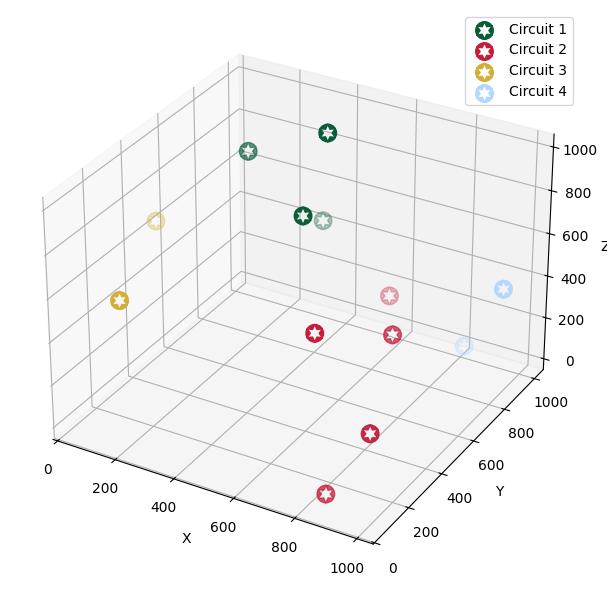

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.path as mpath


def plot_point_sets(point_sets):
    """
    point_sets: list of iterables of (x,y,z)
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    #cmap = plt.cm.get_cmap("Set1")
    christmas_colors = ["#0A5C36", "#C41E3A", "#D4AF37", "#B3D7FF"]

    star = mpath.Path.unit_regular_star(6)
    circle = mpath.Path.unit_circle()
    # concatenate the circle with an internal cutout of the star
    cut_star = mpath.Path(
        vertices=np.concatenate([circle.vertices, star.vertices[::-1, ...]]),
        codes=np.concatenate([circle.codes, star.codes]))
    
    for idx, point_set in enumerate(point_sets):
        pts = np.array(list(point_set))
        ax.scatter(
            pts[:, 0],
            pts[:, 1],
            pts[:, 2],
            s=160,
            color=christmas_colors[idx],
            label=f"Circuit {idx+1}",
            marker=cut_star  #"*"
        )

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_point_sets(point_sets)